In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
dataset = pd.read_csv('dados/dataset_poscompKmeans.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

# Estatistica da base de dados

In [78]:
dataset.head()

,DATA NASC.,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
0,29/11/1989,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,...,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0,0
1,23/02/1995,1,20,4,metodologia da computação,3.0,2.0,3.0,2.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0,0
2,13/12/1991,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0,1
3,29/09/1986,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0,1
4,26/12/1997,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,...,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0,0


In [79]:
dataset['Grupo'].unique()

array([0, 1], dtype=int64)

In [80]:
dataset.shape

(10977, 34)

In [81]:
dataset.tail()

,DATA NASC.,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
10972,17/01/1997,0,12,3,inteligência artificial,3.0,2.0,3.0,3.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,14.0,16.0,8.0,0
10973,04/09/1971,1,14,1,redes de computadores e sistemas distribuidos,1.0,1.0,2.0,2.0,0.0,...,0.0,2.0,1.0,0.0,1.0,1.0,10.0,16.0,9.0,0
10974,08/07/1995,1,24,3,"engenharia de software, gerenciamento de infor...",1.0,2.0,1.0,3.0,0.0,...,2.0,1.0,1.0,0.0,1.0,2.0,9.0,18.0,8.0,0
10975,10/01/1994,1,7,3,inteligência artificial,1.0,2.0,2.0,2.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,10.0,16.0,6.0,0
10976,20/03/1995,1,20,4,sistemas digitais e embarcados,3.0,2.0,2.0,2.0,1.0,...,2.0,0.0,1.0,0.0,1.0,0.0,13.0,17.0,5.0,0


In [82]:
from datetime import datetime, date

def age(idade):
    idade = datetime.strptime(idade, "%d/%m/%Y").date()
    today = date.today()
    return today.year - idade.year - ((today.month, today.day) < (idade.month, idade.day))

In [83]:
dataset['DATA NASC.'] = dataset['DATA NASC.'].apply(age)

In [84]:
dataset = dataset.rename(columns={'DATA NASC.': 'IDADE'})

In [85]:
dataset.head()

,IDADE,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
0,33,1,5,1,teoria da computação,3.0,3.0,2.0,0.0,1.0,...,1.0,3.0,2.0,1.0,1.0,1.0,14.0,21.0,10.0,0
1,28,1,20,4,metodologia da computação,3.0,2.0,3.0,2.0,2.0,...,2.0,1.0,3.0,1.0,2.0,1.0,16.0,22.0,12.0,0
2,31,1,24,3,engenharia de software,0.0,1.0,1.0,1.0,0.0,...,2.0,0.0,2.0,0.0,2.0,1.0,4.0,16.0,8.0,1
3,36,1,13,0,modelagem e gerência de sistemas de informação,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,4.0,13.0,7.0,1
4,25,0,3,0,"computação gráfica, imagens e visualização",0.0,0.0,2.0,2.0,1.0,...,2.0,3.0,3.0,0.0,1.0,1.0,6.0,15.0,11.0,0


## Amostragem simples

In [86]:
def amostragem_aleatoria_simples(dataset, amostras):
    return dataset.sample(n = amostras, random_state=1)

In [87]:
df_amostra_aleatoria_simples = amostragem_aleatoria_simples(dataset, 100)
df_amostra_aleatoria_simples.shape

(100, 34)

In [88]:
df_amostra_aleatoria_simples.head()

,IDADE,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
2333,28,1,14,1,sistemas de computação,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,3.0,1.0,0.0,1.0,5.0,14.0,7.0,1
5768,60,1,24,3,bioinformática,1.0,2.0,1.0,0.0,2.0,...,2.0,2.0,2.0,1.0,2.0,2.0,6.0,18.0,13.0,0
9505,29,1,9,1,sistemas de computação,1.0,1.0,0.0,1.0,2.0,...,0.0,1.0,2.0,0.0,0.0,1.0,6.0,20.0,4.0,1
8427,29,1,23,4,redes de computadores,1.0,1.0,1.0,0.0,3.0,...,1.0,2.0,2.0,2.0,0.0,1.0,10.0,16.0,9.0,0
1094,27,1,24,3,engenharia de software,0.0,1.0,3.0,1.0,0.0,...,2.0,0.0,2.0,1.0,1.0,1.0,7.0,8.0,9.0,1


## Amostragem sistemática

In [89]:
len(dataset) // 100

109

In [90]:
import random

In [91]:
random.seed(1)
random.randint(0, 109)

17

In [92]:
np.arange(17, len(dataset), step=109)

array([   17,   126,   235,   344,   453,   562,   671,   780,   889,
         998,  1107,  1216,  1325,  1434,  1543,  1652,  1761,  1870,
        1979,  2088,  2197,  2306,  2415,  2524,  2633,  2742,  2851,
        2960,  3069,  3178,  3287,  3396,  3505,  3614,  3723,  3832,
        3941,  4050,  4159,  4268,  4377,  4486,  4595,  4704,  4813,
        4922,  5031,  5140,  5249,  5358,  5467,  5576,  5685,  5794,
        5903,  6012,  6121,  6230,  6339,  6448,  6557,  6666,  6775,
        6884,  6993,  7102,  7211,  7320,  7429,  7538,  7647,  7756,
        7865,  7974,  8083,  8192,  8301,  8410,  8519,  8628,  8737,
        8846,  8955,  9064,  9173,  9282,  9391,  9500,  9609,  9718,
        9827,  9936, 10045, 10154, 10263, 10372, 10481, 10590, 10699,
       10808, 10917])

In [93]:
def amostragem_sistematica(dataset, amostras):
    intervalo = len(dataset) // amostras
    random.seed(1)
    inicio = random.randint(0, intervalo)
    indices = np.arange(inicio, len(dataset), step=intervalo)
    amostra_sistematica = dataset.iloc[indices]
    return amostra_sistematica

In [94]:
df_amostra_sistematica = amostragem_sistematica(dataset, 100)
df_amostra_sistematica.shape

(101, 34)

In [95]:
df_amostra_sistematica.head()

,IDADE,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
17,40,0,16,1,interfaces humano-computador,1.0,0.0,3.0,0.0,0.0,...,2.0,3.0,1.0,0.0,0.0,2.0,4.0,11.0,9.0,1
126,27,0,15,4,segurança de dados e criptografia,2.0,1.0,2.0,0.0,1.0,...,1.0,1.0,3.0,1.0,1.0,2.0,8.0,19.0,12.0,0
235,32,1,24,3,inteligência artificial,1.0,1.0,2.0,1.0,2.0,...,1.0,3.0,2.0,1.0,1.0,0.0,9.0,18.0,9.0,0
344,32,0,13,0,engenharia de software,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,2.0,1.0,1.0,0.0,4.0,13.0,5.0,1
453,44,1,15,4,inteligência artificial,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,2.0,0.0,5.0,15.0,4.0,1


## Amostragem por grupos

In [96]:
# len(dataset) / 10

In [97]:
# grupos = []
# id_grupo = 0
# contagem = 0

# for _ in dataset.iterrows():
#     grupos.append(id_grupo)
#     contagem += 1
#     if contagem > 1097:
#         contagem = 0
#         id_grupo += 1

In [98]:
# print(grupos)

In [99]:
# np.unique(grupos, return_counts=True)

In [100]:
# np.shape(grupos), dataset.shape

In [101]:
# dataset['classe'] = grupos

In [102]:
# dataset.tail()

In [103]:
# df_agrupamento = dataset[dataset['classe'] == 7]

In [104]:
# df_agrupamento['classe'].value_counts()

In [105]:
# def amostragem_agrupamento(dataset, numero_grupos):
#     intervalo = len(dataset) / numero_grupos
                    
#     grupos = []
#     id_grupo = 0
#     contagem = 0
#     for _ in dataset.iterrows():
#         grupos.append(id_grupo)
#         contagem += 1
#         if contagem > intervalo:
#             contagem = 0
#             id_grupo += 1
    
#     dataset['classe'] = grupos
#     random.seed(1)
#     grupo_selecionado = random.randint(0, numero_grupos)
#     return dataset[dataset['classe'] == grupo_selecionado]

In [106]:
# df_amostra_agrupamento = amostragem_agrupamento(dataset, 100)
# df_amostra_agrupamento.shape, df_amostra_agrupamento['classe'].value_counts()

## Amostra estratificada

In [107]:
from sklearn.model_selection import StratifiedShuffleSplit

In [108]:
dataset['Grupo'].value_counts()

1    6336
0    4641
Name: Grupo, dtype: int64

In [109]:
6214 / len(dataset), 4763 / len(dataset)

(0.566092739364125, 0.43390726063587504)

In [110]:
0.566092739364125+ 0.43390726063587504

1.0

In [111]:
100 / len(dataset)

0.009109957183201239

In [112]:
split = StratifiedShuffleSplit(test_size=0.009109957183201239) # 10% Essa função é utilizada para treinar modelo
for x, y in split.split(dataset, dataset['Grupo']):
    df_x = dataset.iloc[x]
    df_y = dataset.iloc[y]

In [113]:
df_x.shape, df_y.shape

((10877, 34), (100, 34))

In [114]:
df_y.head()

,IDADE,SEXO,ESTADO,REGIAO,ESPECIALIDADE,Matemática Discreta,Cálculo Diferencial e Integral,Álgebra Linear,Geometria Analítica,Análise Combinatória,...,Inteligência Artificial,Engenharia de Software,Sistemas Distribuídos,Compiladores,Processamento de Imagens,Banco de Dados,matematica,fundamentos_computacao,tecnologia_computacao,Grupo
7534,26,1,23,4,teoria da computação,1.0,2.0,1.0,2.0,3.0,...,1.0,2.0,2.0,2.0,1.0,2.0,14.0,17.0,11.0,0
3394,30,0,5,1,engenharia de software,1.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,0.0,1.0,2.0,9.0,12.0,12.0,0
8280,25,1,12,3,metodologia e tecnicas de computação,2.0,1.0,0.0,1.0,3.0,...,1.0,2.0,1.0,2.0,1.0,0.0,9.0,16.0,9.0,0
7297,44,1,15,4,sistemas embarcados,2.0,1.0,0.0,0.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,8.0,17.0,14.0,0
4950,41,1,9,1,arquitetura de sistemas computacionais,1.0,1.0,1.0,0.0,0.0,...,2.0,0.0,1.0,0.0,0.0,1.0,5.0,10.0,5.0,1


In [115]:
df_y['Grupo'].value_counts()

1    58
0    42
Name: Grupo, dtype: int64

In [116]:
def amostragem_estratificada(dataset, percentual):
    split = StratifiedShuffleSplit(test_size=percentual, random_state=1) # 10% Essa função é utilizada para treinar modelo
    for _, y in split.split(dataset, dataset['Grupo']):
        df_y = dataset.iloc[y]
    return df_y

In [117]:
df_amostra_estratificada = amostragem_estratificada(dataset,0.009109957183201239) 

In [118]:
df_amostra_estratificada.shape

(100, 34)

## Comparativo dos resultados

In [119]:
dataset['IDADE'].mean()

31.55670948346543

In [120]:
df_amostra_aleatoria_simples['IDADE'].mean()

32.29

In [121]:
df_amostra_sistematica['IDADE'].mean()

32.17821782178218

In [122]:
# df_amostra_agrupamento['IDADE'].mean() # amostragem mais próxima.

In [123]:
df_amostra_estratificada['IDADE'].mean()

31.3

## Classificação

In [124]:
import seaborn as sns

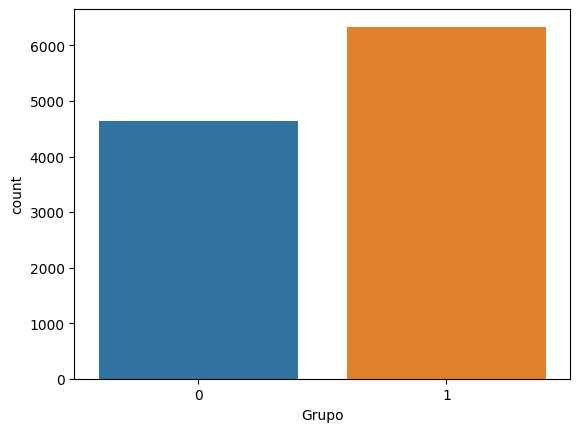

In [125]:
sns.countplot(data=dataset, x='Grupo');

In [126]:
from sklearn.preprocessing import LabelEncoder

labelEnconder = LabelEncoder()

# dataset = dataset.drop(columns=['ESPECIALIDADE'])

In [127]:
X = dataset.iloc[:, 0:32].values

In [128]:
X[:,4] = labelEnconder.fit_transform(X[:,4])

In [129]:
y = dataset.iloc[:, 33].values

## Base de treinamento e teste

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [132]:
X_treinamento.shape, y_treinamento.shape

((8781, 32), (8781,))

In [133]:
X_teste.shape, y_teste.shape

((2196, 32), (2196,))

In [134]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([4641, 6336], dtype=int64))

 ## Classificação com Naïve Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento)

GaussianNB()

In [137]:
previsoes = modelo.predict(X_teste)

In [138]:
previsoes

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [139]:
y_teste

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
 accuracy_score(previsoes, y_teste)

0.9289617486338798

In [142]:
from sklearn.metrics import confusion_matrix

In [143]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[ 853,   81],
       [  75, 1187]], dtype=int64)

<Axes: >

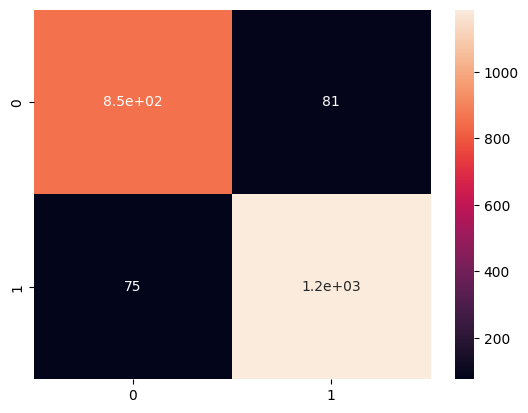

In [144]:
sns.heatmap(cm, annot=True)

# Dados absolutos e relativos

## Percentuais

## Exercício percentuais

## Exercício coneficientes e taxas

# Distribuição de frequência

# Médias artimética, moda e mediana

## Grupo 0 - Bom desempenho

In [145]:
dataset_g0 = dataset.query('Grupo == 0')

In [146]:
especialidades_gZero = dataset_g0['ESPECIALIDADE'].value_counts()[:9]
especialidades_gZero = pd.DataFrame(especialidades_gZero)

In [147]:
especialidades_gZero

,ESPECIALIDADE
inteligência artificial,937
engenharia de software,305
sistemas de computação,193
sistemas de informação,132
computação aplicada,83
ciência computacional,83
sistemas computacionais complexos,82
aprendizado de máquina,81
banco de dados,67


In [148]:
def create_bar_areas(data, x, y, xlabel='', ylabel='', figsize=(10, 4), rotation=0, fontsize=12, save_path=None):
    plt.figure(figsize=figsize)

    # Plotar um gráfico de barras
    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#69b3a2'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


In [149]:
def create_bar_chart(data, x, y, xlabel='', ylabel='', figsize=(8, 4), rotation=0, fontsize=0, save_path=None):
    plt.figure(figsize=figsize)

    # Plotar um gráfico de barras
    sns.barplot(
        x=x,
        y=y,
        data=data,
        color='#69b3a2'
    )

    plt.xlabel(xlabel, fontsize=fontsize)
    plt.ylabel(ylabel, fontsize=fontsize)
    plt.xticks(rotation=rotation, fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()  # Melhora a distribuição dos elementos no gráfico

    if save_path:
        plt.savefig(save_path, dpi=600, bbox_inches='tight')

    plt.show()


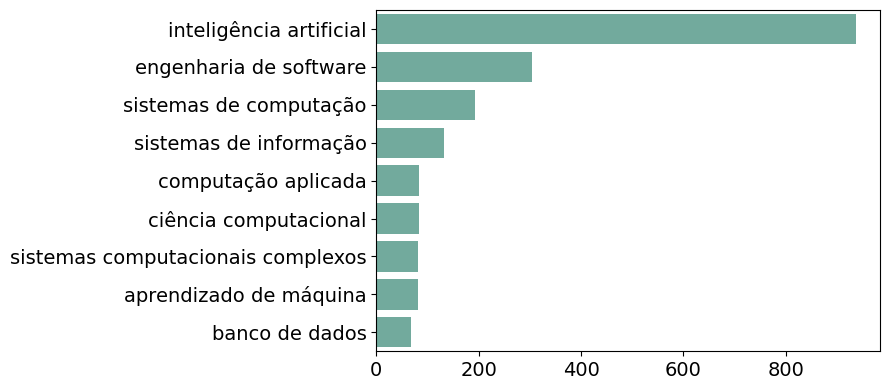

In [150]:
create_bar_chart(
    data=especialidades_gZero,
    x='ESPECIALIDADE',
    y=especialidades_gZero.index,
    figsize=(9, 4),
    rotation=0,
    fontsize=14,
    save_path='imagens/espec_grupoZero.png'
)

In [151]:
media_disciplina_zero = dataset_g0.iloc[:,5:30]
media_disciplina_zero = pd.DataFrame(media_disciplina_zero.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_zero = media_disciplina_zero.reset_index()
media_disciplina_zero

,index,media
0,Técnicas de Programação,2.423616
1,Linguagens de Programação,2.403792
2,Análise de Algoritmos,2.123249
3,Sistemas Distribuídos,2.106658
4,Algoritmos e Estruturas de Dados,1.995691
5,Teoria dos Grafos,1.911441
6,Lógica Matemática,1.786684
7,Álgebra Linear,1.740573
8,Circuitos Digitais,1.585219
9,Análise Combinatória,1.569058


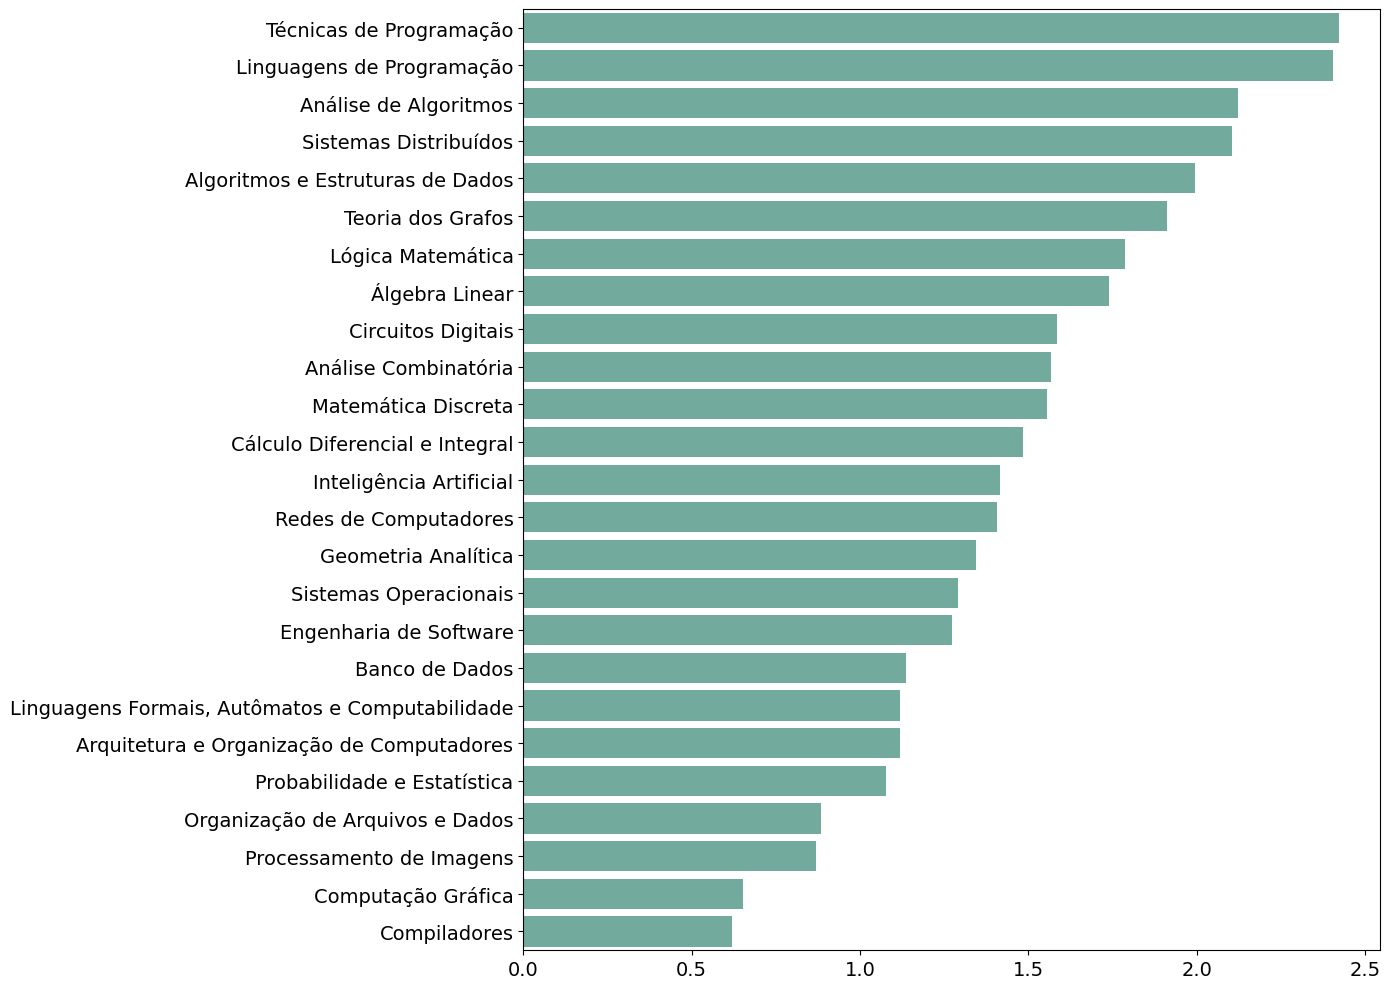

In [152]:
create_bar_chart(
    data=media_disciplina_zero,
    x='media',
    y='index',
    # xlabel='Média',
    # ylabel='Disciplina',
    figsize=(14, 10),
    rotation=0,
    fontsize=14,
    save_path='imagens/disci_grupoZero.png'
)

## Grupo 1 - Baixo desempenho

In [153]:
dataset_g1 = dataset.query('Grupo == 1')

In [154]:
dataset_g1['ESPECIALIDADE'].value_counts()[:10]

inteligência artificial                                            934
engenharia de software                                             788
sistemas de computação                                             402
sistemas de informação                                             273
computação aplicada                                                142
redes de computadores                                              127
banco de dados                                                     121
ciência computacional                                              109
sistemas computacionais complexos                                  107
engenharia de software, banco de dados e informática e educação     81
Name: ESPECIALIDADE, dtype: int64

In [155]:
especialidades_gOne = dataset_g1['ESPECIALIDADE'].value_counts()[:9]
especialidades_gOne = pd.DataFrame(especialidades_gOne)

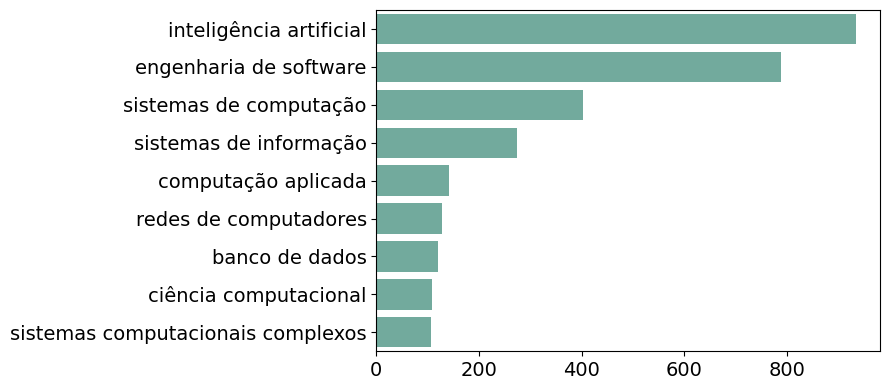

In [159]:
create_bar_chart(
    data=especialidades_gOne,
    x='ESPECIALIDADE',
    y=especialidades_gOne.index,
    figsize=(9, 4),
    rotation=0,
    fontsize=14,
    save_path='imagens/espec_grupoOne.png'
)

In [157]:
media_disciplina_one = dataset_g1.iloc[:,5:30]
media_disciplina_one = pd.DataFrame(media_disciplina_one.mean().sort_values(ascending=False), columns=['media'])
media_disciplina_one = media_disciplina_one.reset_index()
media_disciplina_one

,index,media
0,Técnicas de Programação,2.029987
1,Linguagens de Programação,1.796559
2,Sistemas Distribuídos,1.526515
3,Análise de Algoritmos,1.394886
4,Algoritmos e Estruturas de Dados,1.388889
5,Teoria dos Grafos,1.111111
6,Redes de Computadores,1.042456
7,Circuitos Digitais,1.015783
8,Lógica Matemática,0.994476
9,Matemática Discreta,0.988163


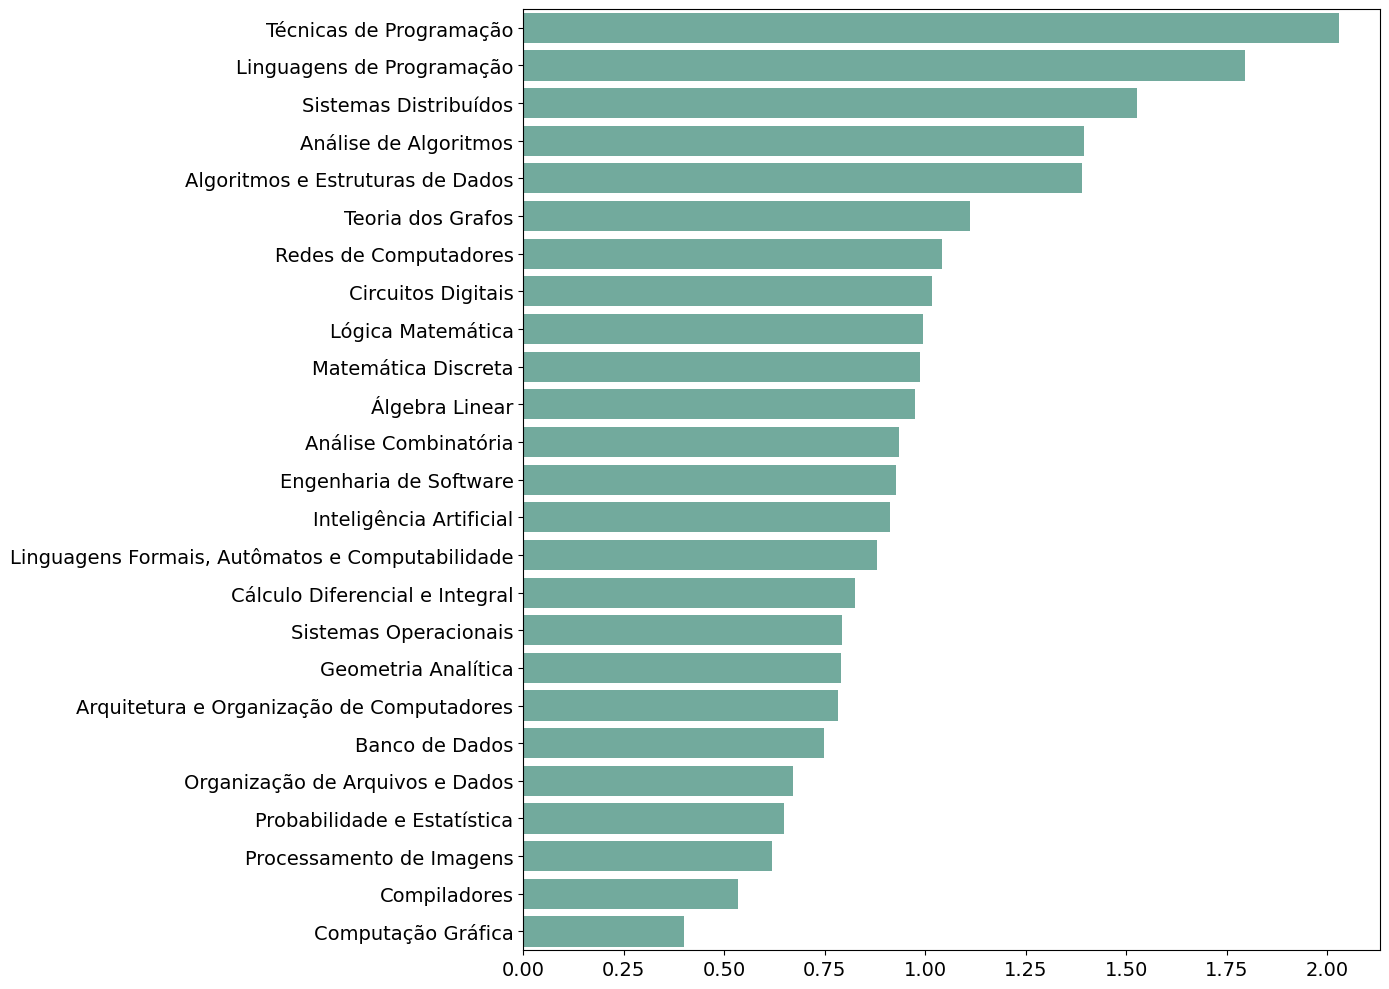

In [158]:
create_bar_chart(
    data=media_disciplina_one,
    x='media',
    y='index',
    # xlabel='Média',
    # ylabel='Disciplina',
    figsize=(14, 10),
    rotation=0,
    fontsize=14,
    save_path='imagens/disci_grupoOne.png'
)